# UMAP (Dimension Reduction like PCA) to visualise clusters

Based on https://antonsruberts.github.io/kproto-audience/#:~:text=K%2DMeans%20is%20generally%20dominated,or%20the%20clustering%20misses%20something.

In [1]:
# Basic Libraries
#!pip install kmodes
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from kmodes.kprototypes import KPrototypes
sb.set() # set the default Seaborn style for graphics

In [2]:
student_por = pd.read_csv('student-por.csv',sep=';')
student_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [4]:
student_por['Medu'] = student_por['Medu'].astype(object)
student_por['Fedu'] = student_por['Fedu'].astype(object)
student_por['traveltime'] = student_por['traveltime'].astype(object)
student_por['studytime'] = student_por['studytime'].astype(object)
student_por['famrel'] = student_por['famrel'].astype(object)
student_por['freetime'] = student_por['freetime'].astype(object)
student_por['goout'] = student_por['goout'].astype(object)
student_por['Dalc'] = student_por['Dalc'].astype(object)
student_por['Walc'] = student_por['Walc'].astype(object)
student_por['health'] = student_por['health'].astype(object)
student_por['failures'] = student_por['failures'].astype(float)
student_por['absences'] = student_por['absences'].astype(float)
student_por['G1'] = student_por['G1'].astype(float)
student_por['G2'] = student_por['G2'].astype(float)
student_por['G3'] = student_por['G3'].astype(float)

In [ ]:
categorical_features = [0,1,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28]
categorical_features

In [8]:
#!pip install umap-learn
from sklearn.preprocessing import PowerTransformer
import umap

In [57]:
#Preprocessing numerical
numerical = student_por.select_dtypes(exclude='object')

pd.options.mode.chained_assignment = None  # default='warn'
for c in numerical.columns:
    pt = PowerTransformer()
    numerical.loc[:, c] = pt.fit_transform(np.array(numerical[c]).reshape(-1, 1))
    
#preprocessing categorical
categorical = student_por.select_dtypes(include='object')
categorical = pd.get_dummies(categorical)

#Percentage of columns which are categorical is used as weight parameter in embeddings later
categorical_weight = len(student_por.select_dtypes(include='object').columns) / student_por.shape[1]

#Embedding numerical & categorical
fit1 = umap.UMAP(metric='l2').fit(numerical)
fit2 = umap.UMAP().fit(categorical)

#Augmenting the numerical embedding with categorical
intersection = umap.umap_.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=categorical_weight)
intersection = umap.umap_.reset_local_connectivity(intersection)
embedding = umap.umap_.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components, 
                                                fit1._initial_alpha, fit1._a, fit1._b, 
                                                fit1.repulsion_strength, fit1.negative_sample_rate, 
                                                200, 'random', np.random, fit1.metric, 
                                                fit1._metric_kwds, output_dens=False, densmap=False, densmap_kwds=False)


In [104]:
embedding[0]

array([[ 3.8112319 , -1.1618176 ],
       [ 4.4211864 , -0.9865823 ],
       [ 4.402373  , -0.72894514],
       ...,
       [ 4.290233  ,  1.3606403 ],
       [ 3.6376674 ,  2.810032  ],
       [ 2.7395918 ,  2.7393653 ]], dtype=float32)

In [120]:
a = np.array(embedding[0].tolist())

array([ 4.42118645, -0.98658228])

In [128]:
embeddf = pd.DataFrame(np.array(embedding[0]))
embeddf[0]

0      3.811232
1      4.421186
2      4.402373
3      1.131784
4      3.817548
         ...   
644    2.367004
645    1.900517
646    4.290233
647    3.637667
648    2.739592
Name: 0, Length: 649, dtype: float32

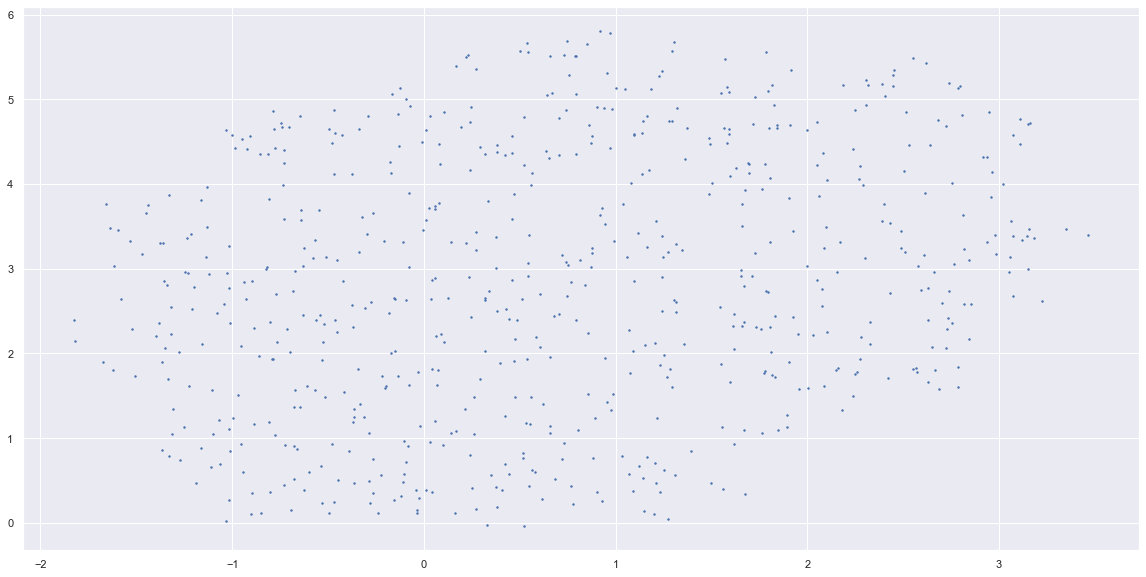

In [129]:
plt.figure(figsize=(20, 10))
plt.scatter(x=embeddf[1],y=embeddf[0], s=2, cmap='Spectral', alpha=1.0)
plt.show()

In [130]:
numerical

,age,failures,absences,G1,G2,G3
0,1.043451,-0.426788,0.587833,-4.073080,-0.238779,-0.376233
1,0.292544,-0.426788,0.072587,-0.875940,-0.238779,-0.376233
2,-1.562535,-0.426788,0.909135,0.216198,0.471715,-0.048324
3,-1.562535,-0.426788,-1.157538,0.948343,0.839513,0.649827
4,-0.568115,-0.426788,-1.157538,-0.148723,0.471715,0.293851
...,...,...,...,...,...,...
644,1.703333,2.338359,0.587833,-0.512794,-0.238779,-0.689356
645,1.043451,-0.426788,0.587833,1.315465,1.215155,1.401543
646,1.043451,-0.426788,0.909135,-0.148723,0.112142,-0.987105
647,0.292544,-0.426788,0.909135,-0.512794,-0.580560,-0.689356


In [131]:
categorical

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,Walc_1,Walc_2,Walc_3,Walc_4,Walc_5,health_1,health_2,health_3,health_4,health_5
0,1,0,1,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1,1,0,1,0,0,1,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,0,1,0,0,1,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
3,1,0,1,0,0,1,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,1,0,1,0,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,1,1,0,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
645,0,1,1,0,0,1,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
646,0,1,1,0,0,1,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
647,0,1,0,1,0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
